In [13]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [15]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [16]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [17]:
#These cells should print the length of df
#df['app_id'].count().compute()

In [18]:
#len(df.index)#ritorna il numero di righe

In [19]:
#le colonne di interesse sono app_id (int64), review, 
#weighted_vote_scre,
#steam_purchase, received_for_free, recommended


In [20]:
#import the dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [21]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [22]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21610 entries, 0 to 21609
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21610 non-null  int64  
 1   app_id                          21610 non-null  int64  
 2   app_name                        21610 non-null  object 
 3   review_id                       21610 non-null  int64  
 4   language                        21610 non-null  object 
 5   review                          21571 non-null  object 
 6   timestamp_created               21610 non-null  int64  
 7   timestamp_updated               21610 non-null  int64  
 8   recommended                     21610 non-null  bool   
 9   votes_helpful                   21610 non-null  int64  
 10  votes_funny                     21610 non-null  int64  
 11  weighted_vote_score             21610 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,805,292030,The Witcher 3: Wild Hunt,85028794,english,"Gwent, you play?",1611143990,1611143990,True,0,...,True,False,False,76561198175203662,41,6,7412.0,2463.0,7412.0,1.610957e+09
1,1039,292030,The Witcher 3: Wild Hunt,84979244,schinese,帮助别人不一定会得到回报，游戏被更多赋予了属于巫师世界的那份“真实性”，而cdrp赋予了游戏...,1611066711,1611066711,True,0,...,True,False,False,76561198251883556,66,2,1430.0,1148.0,1078.0,1.611238e+09
2,2120,292030,The Witcher 3: Wild Hunt,84784400,english,Very good.,1610798996,1610798996,True,0,...,True,False,False,76561198074522842,78,10,4764.0,1269.0,4032.0,1.611172e+09
3,3816,292030,The Witcher 3: Wild Hunt,84496147,turkish,harika,1610377678,1610377678,True,0,...,True,False,False,76561199028053074,43,3,3133.0,1015.0,3101.0,1.610575e+09
4,3916,292030,The Witcher 3: Wild Hunt,84484065,russian,Очень интересная игра . Я не сколечки не пожал...,1610361255,1610361255,True,0,...,True,False,False,76561198885204147,57,7,3515.0,1061.0,3515.0,1.610360e+09


In [23]:
df.duplicated() #Returns a boolean Series denoting duplicate rows

0        False
1        False
2        False
3        False
4        False
         ...  
21605    False
21606    False
21607    False
21608    False
21609    False
Length: 21610, dtype: bool

In [24]:
df.memory_usage( )

Index                                128
Unnamed: 0                        172880
app_id                            172880
app_name                          172880
review_id                         172880
language                          172880
review                            172880
timestamp_created                 172880
timestamp_updated                 172880
recommended                        21610
votes_helpful                     172880
votes_funny                       172880
weighted_vote_score               172880
comment_count                     172880
steam_purchase                     21610
received_for_free                  21610
written_during_early_access        21610
author.steamid                    172880
author.num_games_owned            172880
author.num_reviews                172880
author.playtime_forever           172880
author.playtime_last_two_weeks    172880
author.playtime_at_review         172880
author.last_played                172880
dtype: int64

In [25]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            39
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         31
author.last_played                 0
dtype: int64

<AxesSubplot:>

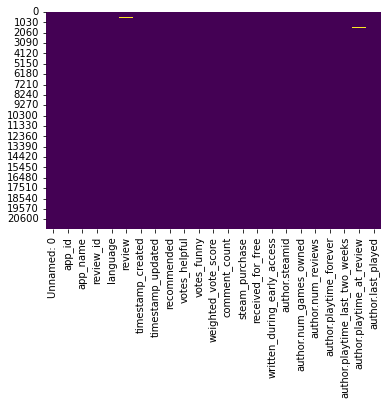

In [26]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

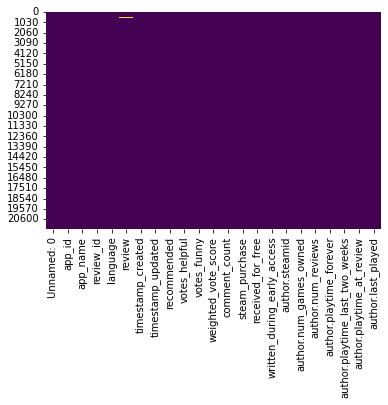

In [27]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

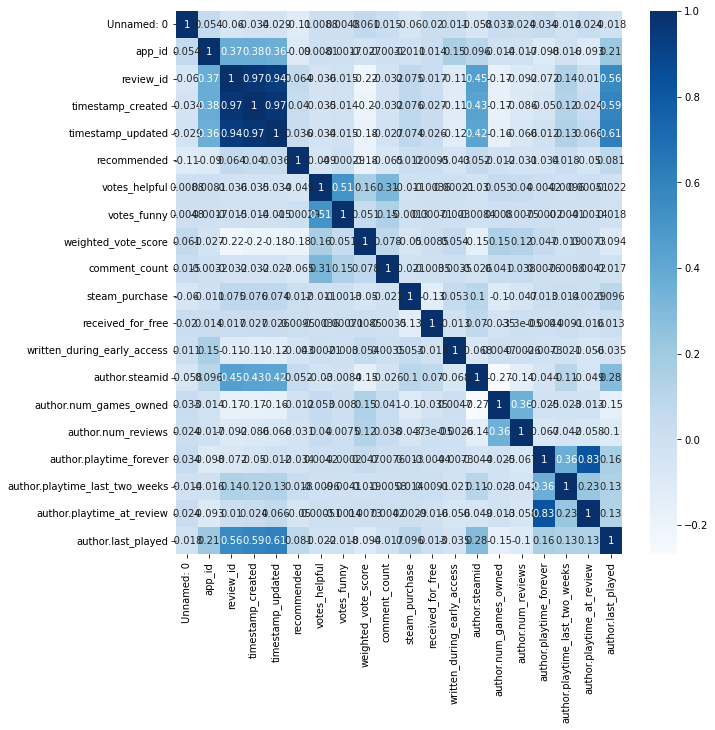

In [28]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

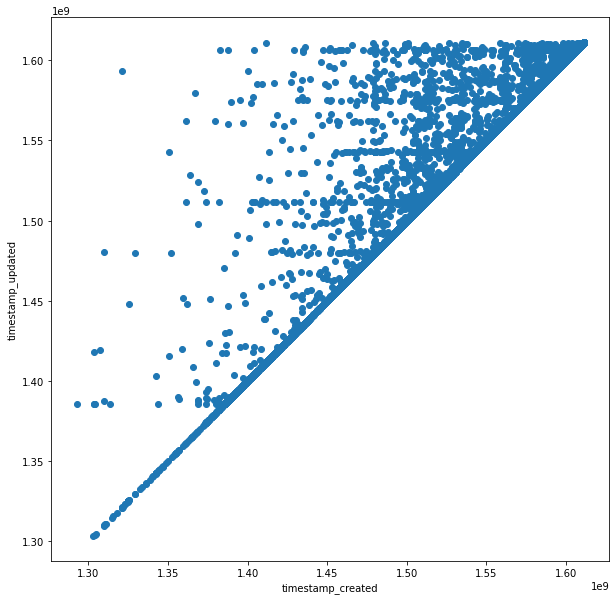

In [29]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [30]:
df["app_name"].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS       1608
Grand Theft Auto V                  1037
Tom Clancy's Rainbow Six Siege       833
Terraria                             687
Garry's Mod                          651
                                    ... 
Farm Manager 2018                      1
BERSERK and the Band of the Hawk       1
Budget Cuts                            1
WWE 2K19                               1
Nova Drift                             1
Name: app_name, Length: 310, dtype: int64

/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

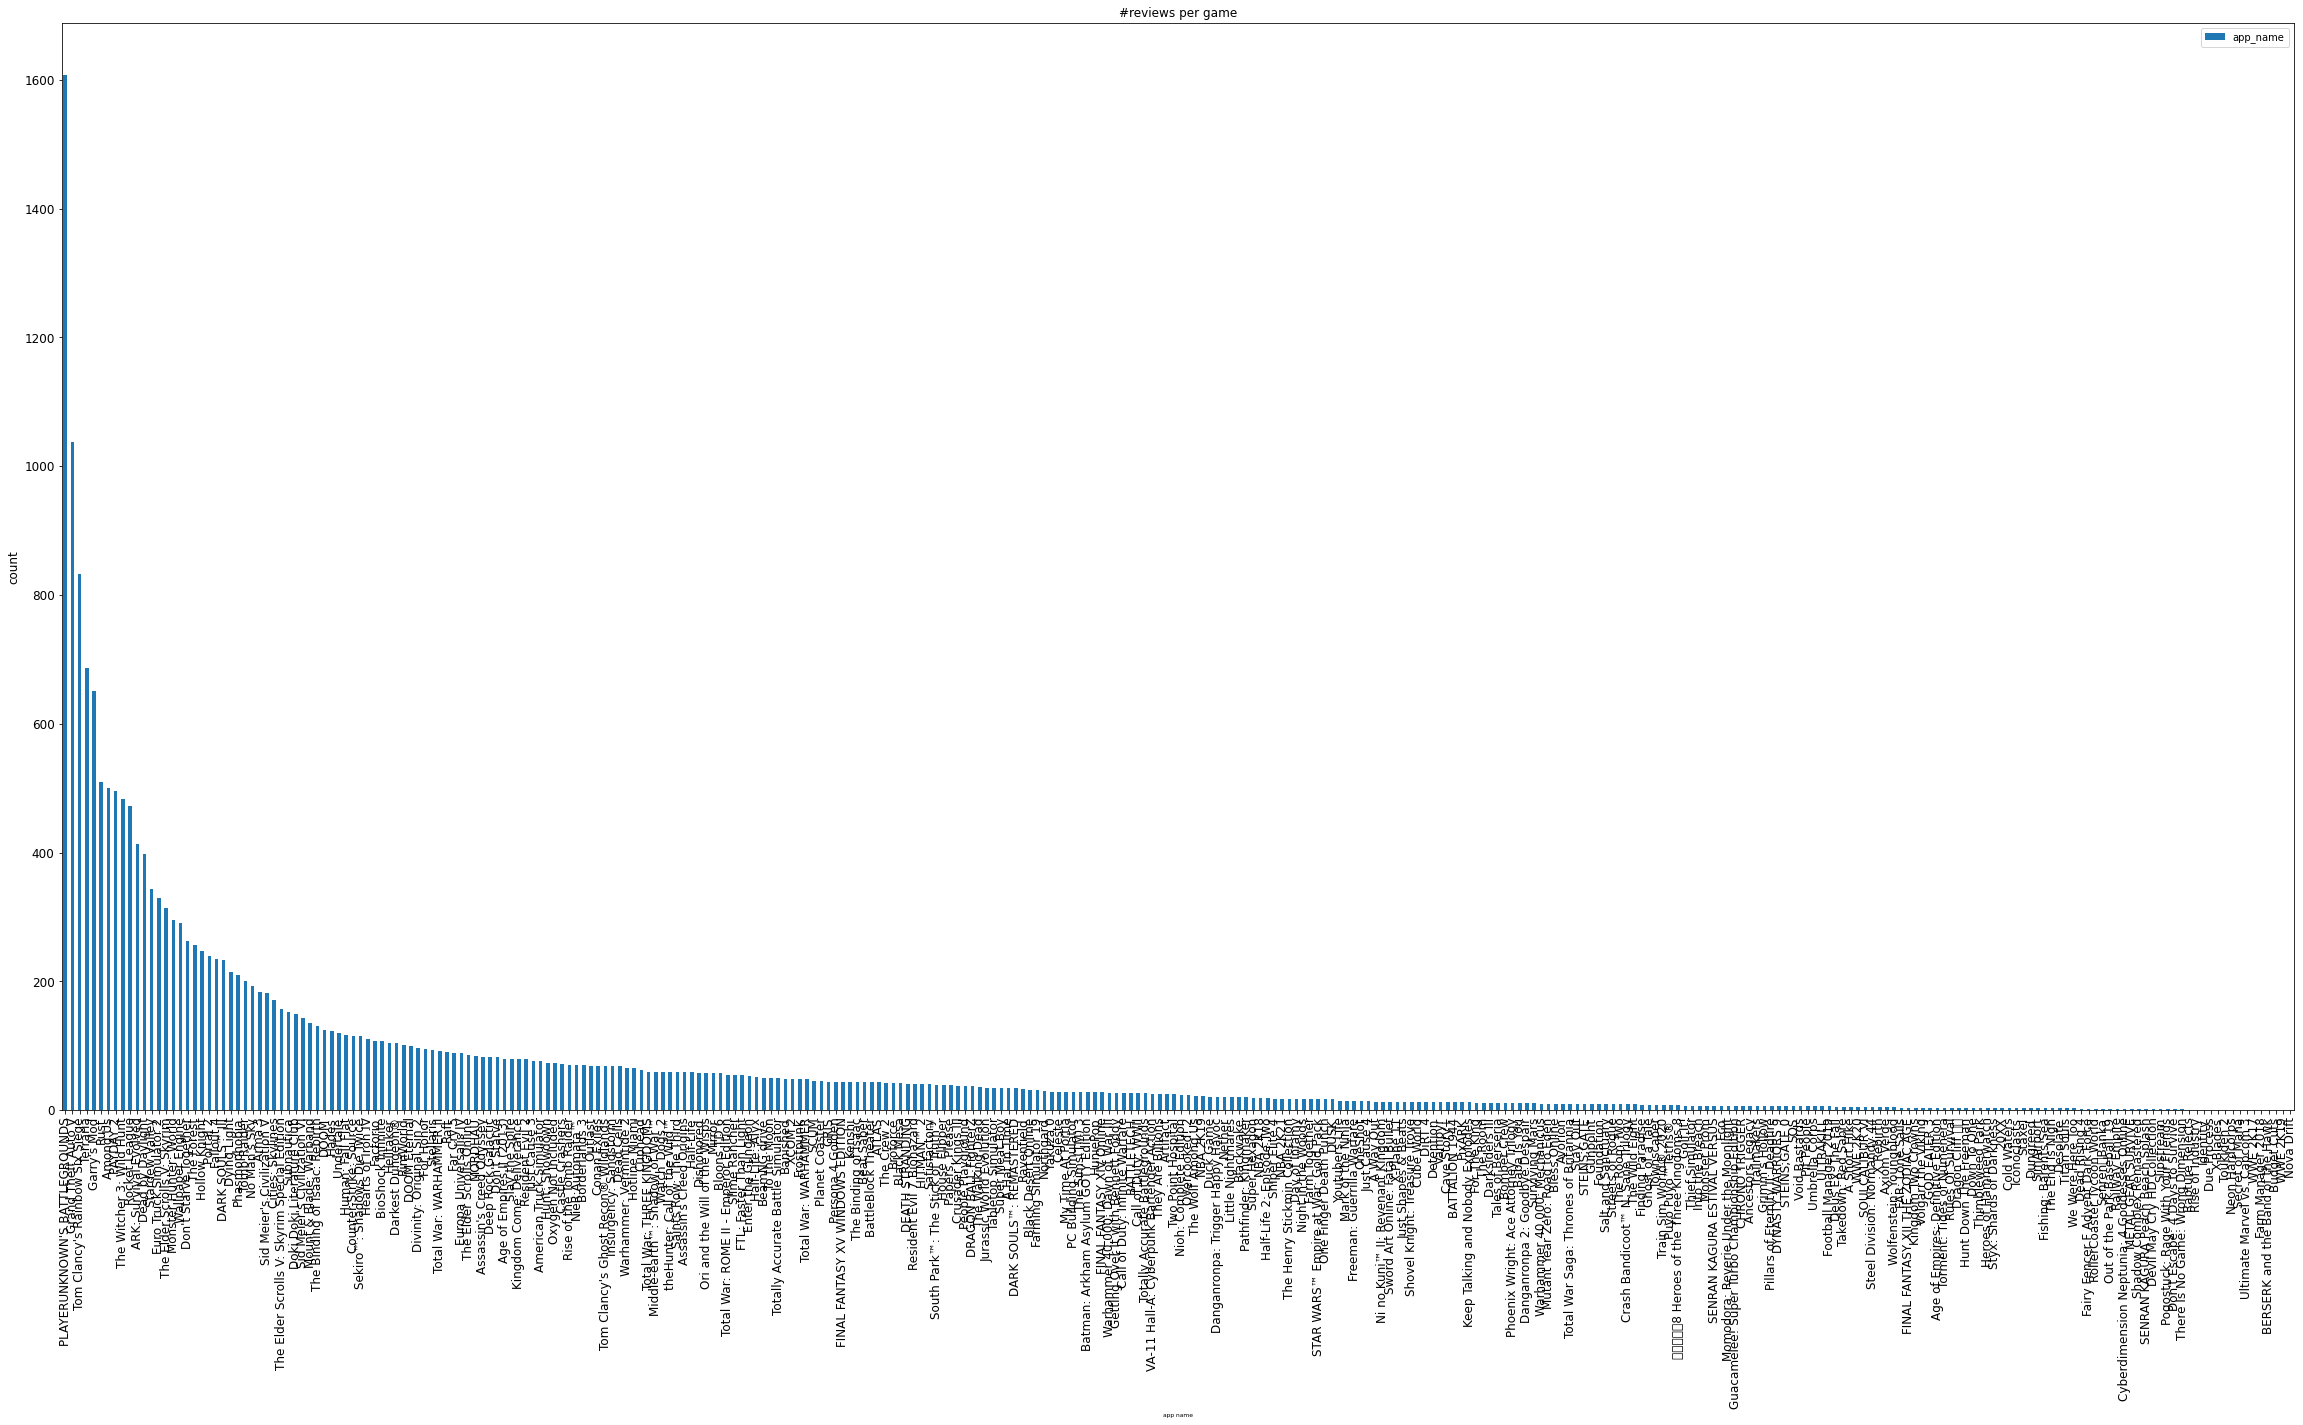

In [31]:
#The only way to read the names is by saving the image and then zooming in
ax=df["app_name"].value_counts().plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=6)
ax.set_ylabel("count", fontsize=12)
plt.show()

### What applications have the best Weighted Vote Score?

In [32]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and take the ones with the highest values -----> we'll implement both approaches

In [46]:
#Here we just pick the 10 games with the highest score
df[['app_name', 'weighted_vote_score']].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
7957,Raft,0.966091
10796,Castle Crashers,0.955322
8982,Resident Evil 2,0.944979
2402,Subnautica,0.936665
10942,GRIS,0.915101
15505,Monster Hunter: World,0.907049
2579,Beat Saber,0.906780
9219,Tomb Raider,0.905519
2109,Dead by Daylight,0.905143
3705,Hollow Knight,0.904852


In [48]:
#MEAN METHOD
app_vote_mean = df[['app_name', 'weighted_vote_score']].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
WWE 2K17,0.628089
Dead Rising 4,0.615954
METAL GEAR SURVIVE,0.582539
Identity,0.573905
Secret of Mana,0.570184
SENRAN KAGURA Peach Beach Splash,0.551339
DYNASTY WARRIORS 9,0.545096
Nova Drift,0.523810
Styx: Shards of Darkness,0.523747


### Which applications have the most and the least recommendations?